In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer


# Training shapes, accuracy = 99%

In [3]:
training_generator = tf.keras.preprocessing.image_dataset_from_directory('A_Set_Data/set_shape',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
                                                                         
)

Found 13149 files belonging to 3 classes.


In [4]:
CNN_shapes = Sequential()

CNN_shapes.add(InputLayer(input_shape= (256,256,3)))


CNN_shapes.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
CNN_shapes.add(MaxPooling2D())


CNN_shapes.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
CNN_shapes.add(MaxPooling2D())


CNN_shapes.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

#CNN_shapes.add(GlobalAveragePooling2D())

CNN_shapes.add(Flatten())   #Flatten worked best for all but number of shapes
CNN_shapes.add(Dense(128, activation='relu'))
CNN_shapes.add(Dropout(.25))
CNN_shapes.add(Dense(64, activation='relu'))
CNN_shapes.add(Dropout(.15))
CNN_shapes.add(Dense(3, activation='softmax'))  

CNN_shapes.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
CNN_shapes.summary()
CNN_shapes.fit(training_generator, epochs = 3)
    
    
    
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 20)      1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 30)        5430      
_________________________________________________________________
flatten (Flatten)            (None, 122880)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
shapes_history = CNN_shapes.fit(training_generator, epochs = 3)


# Training number, accuracy = 96%

In [25]:
training_generator = tf.keras.preprocessing.image_dataset_from_directory('A_Set_Data/set_number',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
                                                                         
)

Found 13131 files belonging to 3 classes.


In [26]:
CNN_number = Sequential()

CNN_number.add(InputLayer(input_shape= (256,256,3)))


CNN_number.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
CNN_number.add(MaxPooling2D())


CNN_number.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
CNN_number.add(MaxPooling2D())


CNN_number.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

CNN_number.add(GlobalAveragePooling2D())  #GlobalAverage made a big difference for number

#CNN_number.add(Flatten())
CNN_number.add(Dense(128, activation='relu'))
CNN_number.add(Dropout(.25))
CNN_number.add(Dense(56, activation='relu'))
CNN_number.add(Dropout(.16))
CNN_number.add(Dense(3, activation='softmax'))  

CNN_number.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
CNN_number.summary()
CNN_number.fit(training_generator, epochs = 4)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 256, 256, 10)      280       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 128, 128, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 20)      1820      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 30)        5430      
_________________________________________________________________
global_average_pooling2d_3 ( (None, 30)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

In [30]:
from keras.applications import mobilenet_v2
from keras.preprocessing import image


def prepare_image(img_path):

    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = mobilenet_v2.preprocess_input(x)
    return x

In [68]:
# Hmm, notebook seems way ot of order. Go back and clean it up Nathan!!

#import numpy as np
#x = prepare_image('A_Set_Data/test_set_number/three/DSC_5099_0_6.jpg')

#out = CNN_number.predict(x)
#print('Predicted:', mobilenet_v2.decode_predictions(out))

In [36]:
x = prepare_image('A_Set_Data/set_number/one/1_red/1-red-solid-oval/DSC_5110_1_25.jpg')

out = CNN_number.predict(x)
print(out)  # this doesn't make sense 

[[0.3212677  0.27859175 0.40014055]]


In [21]:
testing_generator = tf.keras.preprocessing.image_dataset_from_directory('A_Set_Data/test_set_number',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
                                                                         
)

Found 12 files belonging to 3 classes.


In [69]:
#testing 12 images not included in training. Easy 100% :)
CNN_number.evaluate(testing_generator)

12/12 [==============================] - 0s 6ms/step - loss: 0.0296 - accuracy: 1.0000


[0.029556840658187866, 1.0]

# Training color, accuracy = 99%

In [8]:
training_generator = tf.keras.preprocessing.image_dataset_from_directory('A_Set_Data/set_color',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
                                                                         
)

Found 13149 files belonging to 3 classes.


In [9]:
CNN_color = Sequential()

CNN_color.add(InputLayer(input_shape= (256,256,3)))


CNN_color.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
CNN_color.add(MaxPooling2D())


CNN_color.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
CNN_color.add(MaxPooling2D())


CNN_color.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

CNN_color.add(GlobalAveragePooling2D())


CNN_color.add(Dense(256, activation='relu'))
CNN_color.add(Dropout(.28))
CNN_color.add(Dense(128, activation='relu'))
CNN_color.add(Dropout(.14))
CNN_color.add(Dense(3, activation='softmax'))  

CNN_color.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
CNN_color.summary()
CNN_color.fit(training_generator, epochs = 3)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 10)      280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 20)      1820      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 30)        5430      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

In [19]:
testing_generator = tf.keras.preprocessing.image_dataset_from_directory('A_Set_Data/test_set_color',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
                                                                         
)

Found 12 files belonging to 3 classes.


In [20]:
CNN_color.evaluate(testing_generator)

12/12 [==============================] - 0s 5ms/step - loss: 6.6855e-06 - accuracy: 1.0000


[6.685453627142124e-06, 1.0]

In [ ]:
CNN_confusion_matrix = confusion_matrix()

sns.heatmap(model_confusion_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [ ]:
# Training fillings, accuracy = 91%

In [38]:
training_generator = tf.keras.preprocessing.image_dataset_from_directory('A_Set_Data/set_shading',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
                                                                         
)

Found 13142 files belonging to 3 classes.


# Some cells are out of order. Definitely need to clean up. 

In [40]:
import numpy as np

image_arrays = []
image_labels = []
predictions = []

for images, labels in training_generator:
    CNN_shading.predict(images)

    image_arrays.append(images)
    image_labels.extend(labels)
    predictions.extend(np.argmax(CNN_shading.predict(images), axis=1))

results_list = [np.argmax(x.numpy()) for x in image_labels]


all_images = np.concatenate(image_arrays)
    


In [65]:
#results_list

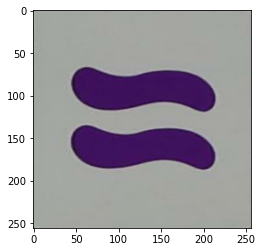

In [42]:
plt.imshow((all_images[2])/255)

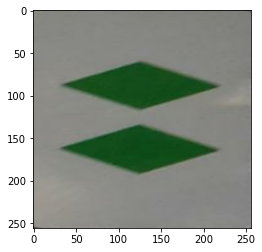

In [43]:
plt.imshow((all_images[0])/255)

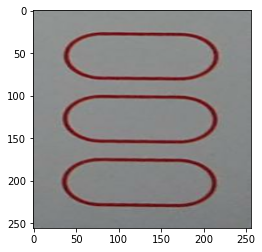

In [44]:
plt.imshow((all_images[1])/255)

In [67]:
results['correct?'] = results['labels'] == results['predictions']

In [61]:
#results[~results['correct?']]

In [46]:
image_dict = {'labels': results_list, 'predictions': predictions}

results = pd.DataFrame(image_dict)
results

,labels,predictions
0,1,1
1,0,0
2,1,1
3,2,2
4,2,2
...,...,...
13137,1,1
13138,0,0
13139,0,2
13140,0,2


In [49]:
np.argmax(image_labels[0].numpy())

1

In [50]:
image_labels[0].numpy()

array([0., 1., 0.], dtype=float32)

In [56]:
CNN_shading.predict(images/255)

array([[3.9274848e-01, 1.2382616e-01, 4.8342538e-01],
       [3.4975195e-01, 1.4268687e-01, 5.0756121e-01],
       [3.2798842e-01, 1.5768687e-01, 5.1432472e-01],
       [2.5045907e-01, 3.1019285e-01, 4.3934807e-01],
       [3.3678752e-01, 1.4838150e-01, 5.1483101e-01],
       [1.3847537e-04, 9.9979597e-01, 6.5593478e-05],
       [6.5354223e-04, 9.9793148e-01, 1.4150008e-03],
       [3.7527797e-01, 1.3355368e-01, 4.9116838e-01],
       [3.8980567e-01, 1.3624243e-01, 4.7395194e-01],
       [1.7407174e-01, 5.0001121e-01, 3.2591707e-01],
       [2.9977024e-01, 1.4570840e-01, 5.5452138e-01],
       [1.3057007e-04, 9.9978274e-01, 8.6630818e-05],
       [1.1750979e-04, 9.9979156e-01, 9.0934169e-05],
       [3.3018261e-01, 1.5792491e-01, 5.1189244e-01],
       [3.2535711e-01, 1.5679060e-01, 5.1785225e-01],
       [3.6449796e-01, 1.4104915e-01, 4.9445289e-01],
       [2.6806462e-01, 3.0184993e-01, 4.3008542e-01],
       [2.8387767e-01, 2.3910663e-01, 4.7701567e-01],
       [4.1143936e-01, 1.197

In [64]:
# Checking some predictions. Would be nice to have word labels mapped to 0,1,2 :)

In [62]:
np.argmax(CNN_shapes.predict(images), axis=1)

array([2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1])

In [63]:
np.argmax(CNN_number.predict(images), axis=1)

array([2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0])

In [58]:
np.argmax(CNN_color.predict(images), axis=1)

array([1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1])

In [13]:
CNN_shading = Sequential()

CNN_shading.add(InputLayer(input_shape= (256,256,3)))


CNN_shading.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
CNN_shading.add(MaxPooling2D())


CNN_shading.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
CNN_shading.add(MaxPooling2D())


CNN_shading.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

#CNN_shading.add(GlobalAveragePooling2D())

CNN_shading.add(Flatten())
CNN_shading.add(Dense(256, activation='relu'))
CNN_shading.add(Dropout(.20))
CNN_shading.add(Dense(128, activation='relu'))
CNN_shading.add(Dropout(.10))
CNN_shading.add(Dense(3, activation='softmax'))  

CNN_shading.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
CNN_shading.summary()
CNN_shading.fit(training_generator, epochs = 3)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 256, 256, 10)      280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 20)      1820      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 30)        5430      
_________________________________________________________________
flatten_3 (Flatten)          (None, 122880)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)              

In [16]:
testing_generator = tf.keras.preprocessing.image_dataset_from_directory('A_Set_Data/test_set_shade',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
                                                                         
)

Found 12 files belonging to 3 classes.


In [17]:
CNN_shading.evaluate(testing_generator) #Another 100% woot ;)

12/12 [==============================] - 0s 16ms/step - loss: 7.7017e-04 - accuracy: 1.0000


[0.0007701722788624465, 1.0]

In [66]:
import numpy as np

image_arrays = []
image_labels = []
predictions = []

for images, labels in training_generator:
    CNN_shading.predict(images)

    image_arrays.append(images)
    image_labels.extend(labels)
    predictions.extend(np.argmax(CNN_shading.predict(images), axis=1))

results_list = [np.argmax(x.numpy()) for x in image_labels]


all_images = np.concatenate(image_arrays)
    



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
#Gave up on labelling the classes. (0,1,2) isn't that hard to remember

y_pred = CNN_shading.predict(testing_generator)

y_pred_classes = [np.argmax(object) for object in y_pred]

#names = {'0': 'emply','1': 'filled','2': 'shaded'}

names = {0: 'emply', 1: 'filled', 2: 'shaded'}

mySeries = pd.Series(y_pred_classes)

mySeries.map(names)


    